# TP images: convolutions
## Données numériques - 2022-23
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [21]:
from skimage import io
from skimage import data
from skimage import transform
import skimage
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

## Image issue de la bibliothèque scikit-image

*section similaire au TP précédent*

In [4]:
img = data.chelsea()
#img = io.imread('/home/lingrand/Ens/SSII/Cours8-contours/carreNoir.png')

In [5]:
print(img.shape)

(300, 451, 3)


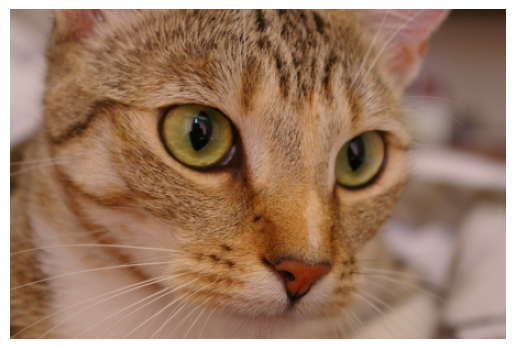

In [6]:
plt.axis('off')
plt.imshow(img)

## Implémentation de la convolution

In [9]:
# img est supposée à 1 canal et k de dimensions carrées impaires
# on va ignorer les problèmes aux bords
def maConvolution(img, k):
    # make sure the image is in 3D
    if len(img.shape) == 2:
        img = np.expand_dims(img, axis=2)
    
    # flip the kernel
    for _ in range(2):
        k = np.rot90(k)

    (h,w) = img.shape[:2]
    dimK = k.shape[0]
    d = dimK // 2
    res = np.zeros(shape=img.shape, dtype=img.dtype)

    for i in range(d,h-d):
        for j in range(d,w-d):
            for color in range(img.shape[2]):
                res[i,j,color] = np.sum(img[i-d:i+d+1,j-d:j+d+1,color]*k)

    return res

Pour tester cet opérateur, vous pouvez utiliser un filtre moyenneur (3x3) sur une image en niveau de gris

In [8]:
grayImage = data.camera()
kernel = np.ones((3,3))/9
res = maConvolution(grayImage, kernel)
plt.imshow(res, cmap='gray')

Faites en sorte que le code précédent fonctionne également avec des images couleurs. Observez bien les résultats.

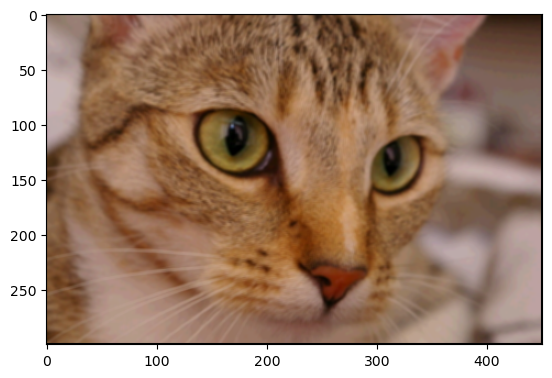

In [ ]:
image = data.chelsea()
kernel = np.ones((3,3))/9
res = maConvolution(image, kernel)
plt.imshow(res)

## Lissage par convolution

Testez le lissage Gaussien par la convolution avec le noyau $\frac{1}{16}\begin{pmatrix} 1 & 2 & 1\\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{pmatrix}$.


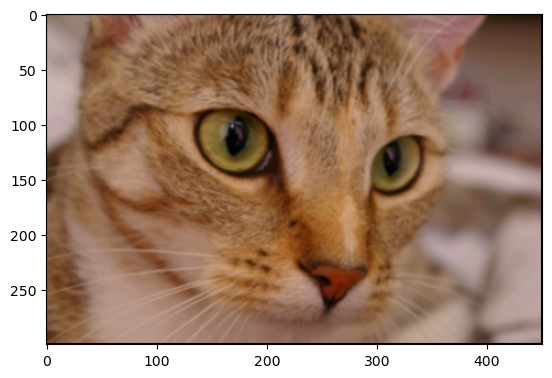

In [ ]:
lissGauss3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]])
lissGauss3x3 = lissGauss3x3 / np.sum(lissGauss3x3)
res = maConvolution(image, lissGauss3x3)
plt.imshow(res)

## Contours par dérivée première

Un détecteur célèbre est celui de Sobel. Regardez les contours en x et en y avant de recomposer l'image résultat.

Si vous avez le moindre doute, essayez le détecteur sur une image simple, par exemple un carré noir sur fond blanc.

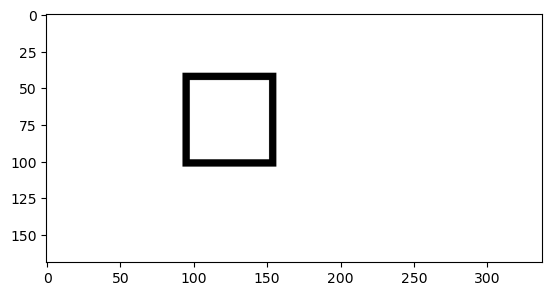

In [3]:
img = io.imread('./square.png')
plt.imshow(img)

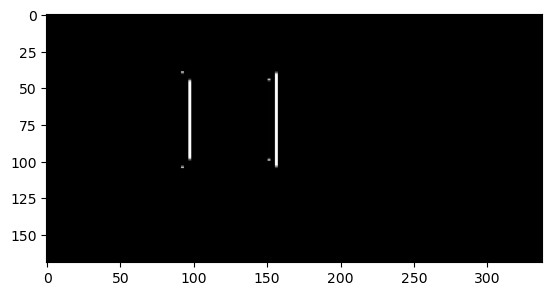

In [6]:
# calcul des contours horizontaux
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])/4.0

res_sobelx = maConvolution(img, sobelx)

plt.imshow(res_sobelx)


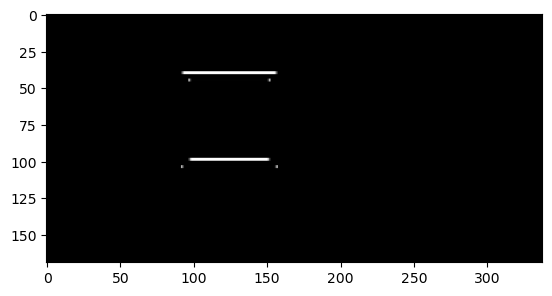

In [10]:
# calcul des contours verticaux
sobely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])/4.0

res_sobely = maConvolution(img, sobely)

plt.imshow(res_sobely, cmap='gray')

In [19]:
# compose res_sobelx et res_sobely
res_sobel = np.sqrt(res_sobelx**2 + res_sobely**2, dtype=np.float64)

Regardez les contours de Sobel de plusieurs images de votre choix.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


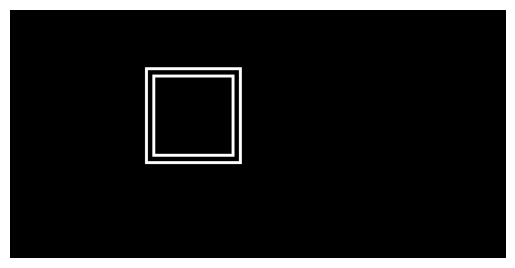

In [20]:
# hide the axes
plt.axis('off')
plt.imshow(res_sobel)

Testez d'autres filtres de contours par dérivée première comme par exemple celui de <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.prewitt">Prewitt</a>.

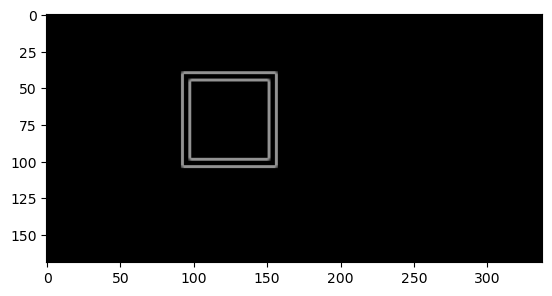

In [23]:
res_prewitt = skimage.filters.prewitt(img)

plt.imshow(res_prewitt)

## Contours par dérivée seconde

Testez également le détecteur de <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.laplace">Laplace</a>.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


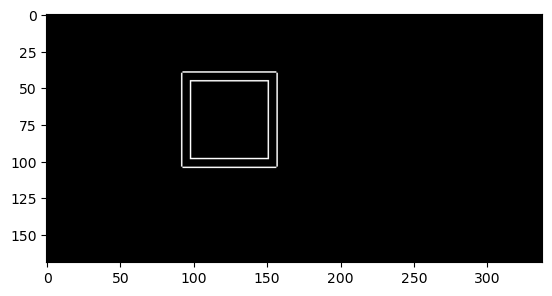

In [24]:
res_scharr = skimage.filters.laplace(img)

plt.imshow(res_scharr)

## Contour par différence de gaussienne

Lissez de deux façons différentes une image et regardez la différence (en valeur absolue).

/nix/store/9zs49yh68s70wkbl3ll3bzlibv48n343-python3-3.10.11-env/lib/python3.10/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


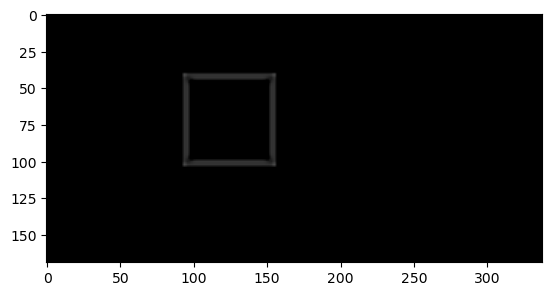

In [25]:
# blur the image with a gaussian filter 3x3
img_blur = skimage.filters.gaussian(img, sigma=1)
# blur the image with a gaussian filter 5x5
img_blur2 = skimage.filters.gaussian(img, sigma=2)

# compute the difference between the two blurred images
img_diff = img_blur2 - img_blur

# plot image diff in big
plt.figure(figsize=(10,10))
plt.imshow(img_diff, cmap='gray')



## Points d'intérêt (partie facultative, uniquement si tout est fait avant et compris)

### Harris

Commençons par Harris:

In [ ]:
from skimage.feature import corner_harris, corner_peaks

In [ ]:
pts=corner_peaks(corner_harris(img[:,:,1]), min_distance=1)
print( pts.shape[0], ' points found')
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.scatter(y=pts[:,0],x=pts[:,1],c='r',s=10)
plt.show()

Comment ajouter des points d'intérêt ? Examinez les paramètres par défaut.

### SIFT

Testons SIFT: pour cela, nous pouvons utiliser l'implémentation de OpenCV. Il faudra cependant installer la librairie.

In [ ]:
# si nécessaire, installation :
#            !pip install opencv-contrib-python

import cv2
print(cv2.__version__)

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)
cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

Que contiennent les variables kp et des ? Quelles sont les dimensions ?

In [ ]:
print(len(kp))
print(type(kp[0]))
print(len(des))
print(type(des[0]))
print(des.shape)